<a href="https://colab.research.google.com/github/AngelB26/ICTAK/blob/main/unsupervised_learning_k_means_ict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt

In [54]:
data=pd.read_csv('/content/Mall_Customers.csv')

In [55]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [56]:
data.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [58]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [59]:
data.shape

(200, 5)

In [60]:
data['CustomerID'].nunique()

200

In [61]:
#can do encoding but here now we are using mapping
data['Genre']=data['Genre'].map({'Male':1,'Female':0})

In [62]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [63]:
#there is no target because it is un-supervised learning

In [64]:
x=data.drop(['CustomerID'],axis=1)

In [65]:
#KMeans

In [66]:
from sklearn.cluster import KMeans

In [67]:
wcss=[]
for i in range(1,11):
 km=KMeans(n_clusters=i,n_init=10)
 km.fit(x)
 css=km.inertia_
 wcss.append(css)

In [68]:
wcss

[308862.06000000006,
 212889.44245524303,
 143391.59236035676,
 104422.83498539751,
 75412.59682443162,
 58348.641363315044,
 51165.18423710792,
 44357.6215098352,
 41591.123338467085,
 37579.20016650016]

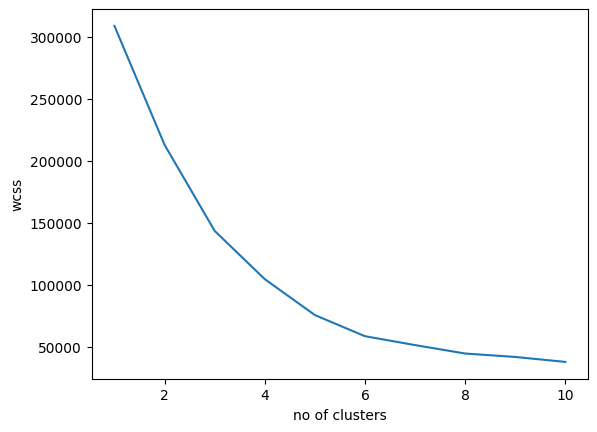

In [69]:
plt.plot(range(1,11),wcss)
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [70]:
#drastic change shows in 5... so 5 is the optimum no of clusters

In [71]:
#from elbow method 5 is the optimum no of clusters

In [72]:
km=KMeans(n_clusters=5,n_init=10)

In [73]:
km.fit(x)

KMeans(n_clusters=5, n_init=10)

In [74]:
y_km=km.predict(x)

In [75]:
y_km

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 2, 0, 4, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 4, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

In [76]:
pd.Series(y_km).value_counts()

4    79
0    39
2    36
1    23
3    23
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

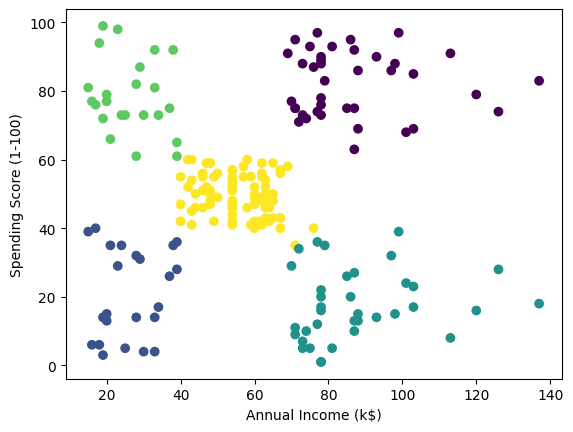

In [77]:
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],c=y_km)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show

In [78]:
data['Cluster']=y_km

In [79]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,1
1,2,1,21,15,81,3
2,3,0,20,16,6,1
3,4,0,23,16,77,3
4,5,0,31,17,40,1


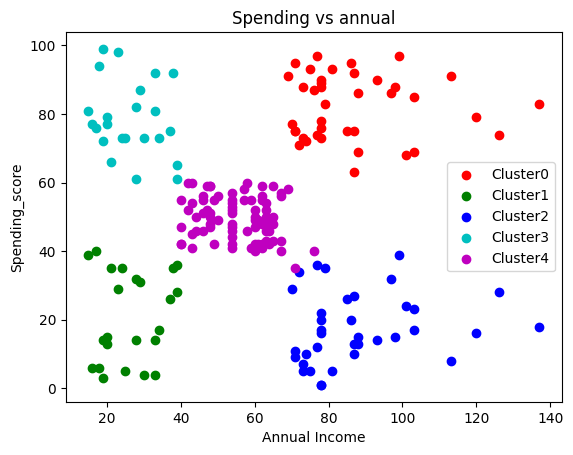

In [80]:
colors=['r','g','b','c','m']
for i in range(max(y_km)+1):
  cluster_data=x[y_km==i]
  plt.scatter(cluster_data['Annual Income (k$)'],
              cluster_data['Spending Score (1-100)'],
              c=colors[i],
              label=f'Cluster{i}')
plt.xlabel('Annual Income')
plt.ylabel('Spending_score')
plt.title('Spending vs annual')
plt.legend()

In [81]:
#agglomerative hierarchial clustering

In [82]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

In [83]:
#another method ward
mergings=linkage(x,method='ward')

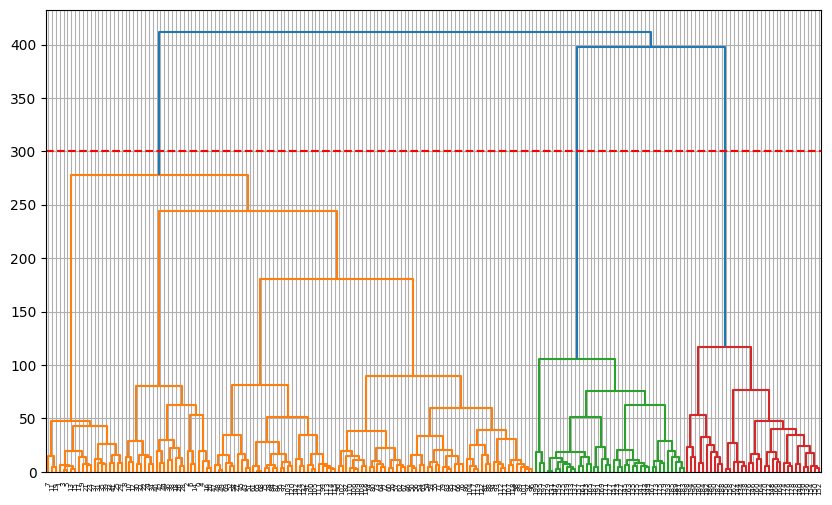

In [84]:
plt.figure(figsize=(10,6))
dendrogram(mergings)
plt.axhline(300,color='r',linestyle='--')
plt.grid()
plt.show()


In [85]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='ward')
y_hc=hc.fit_predict(x)

In [86]:
y_hc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

<function matplotlib.pyplot.show(close=None, block=None)>

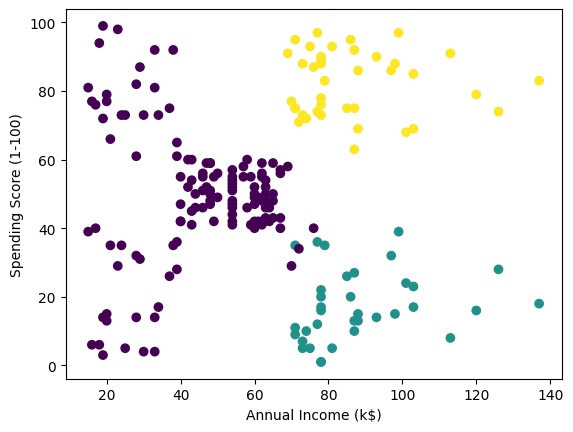

In [87]:
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],c=y_hc)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show

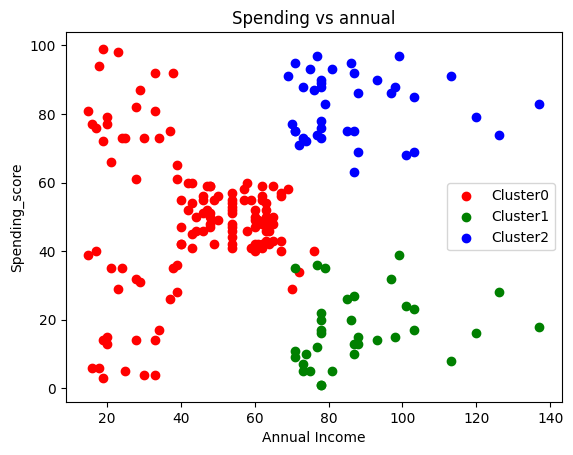

In [88]:
colors=['r','g','b','c','m']
for i in range(max(y_hc)+1):
  cluster_data=x[y_hc==i]
  plt.scatter(cluster_data['Annual Income (k$)'],
              cluster_data['Spending Score (1-100)'],
              c=colors[i],
              label=f'Cluster{i}')
plt.xlabel('Annual Income')
plt.ylabel('Spending_score')
plt.title('Spending vs annual')
plt.legend()

In [89]:
from sklearn.metrics import silhouette_score
silhouette=silhouette_score(x,y_hc)


In [90]:
silhouette

0.3812859576468096

In [91]:
silhouette=silhouette_score(x,y_km)

In [92]:
silhouette

0.4440669204743008